In [3]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
amazon_files = glob.glob("data/datasets/office31/amazon/*", recursive=True)
dict_count = dict()
for i in range(len(amazon_files)):
   num_files = len(glob.glob(os.path.join(amazon_files[i], "*")))
   dict_count[amazon_files[i].split("/")[-1]] = num_files
amazon_num_files = pd.Series(dict_count)

dslr_files = glob.glob("data/datasets/office31/dslr/*", recursive=True)
dict_count = dict()
for i in range(len(dslr_files)):
   num_files = len(glob.glob(os.path.join(dslr_files[i], "*")))
   dict_count[dslr_files[i].split("/")[-1]] = num_files
dslr_num_files = pd.Series(dict_count)

webcam_files = glob.glob("data/datasets/office31/dslr/*", recursive=True)
dict_count = dict()
for i in range(len(amazon_files)):
   num_files = len(glob.glob(os.path.join(dslr_files[i], "*")))
   dict_count[dslr_files[i].split("/")[-1]] = num_files
webcam_num_files = pd.Series(dict_count)

In [5]:
num_files = pd.concat([amazon_num_files, dslr_num_files, webcam_num_files], axis=1)
num_files.columns = ["A", "D", "W"]
num_files["A2D_ratio"] = np.exp(num_files["A"] / num_files["A"].sum()) / np.exp(num_files["D"] / num_files["D"].sum())
num_files["A2W_ratio"] = np.exp(num_files["A"] / num_files["A"].sum()) / np.exp(num_files["W"] / num_files["W"].sum())
num_files["W2A_ratio"] = np.exp(num_files["W"] / num_files["W"].sum()) / np.exp(num_files["A"] / num_files["A"].sum())
num_files["D2A_ratio"] = np.exp(num_files["D"] / num_files["D"].sum()) / np.exp(num_files["A"] / num_files["A"].sum())
num_files.reset_index(inplace=True)

In [6]:
a_d_align_path = "/data/home/jkataok1/AVATAR2022/checkpoints/office31_adapt_amazon2dslr_bs32_resnet50_lr0.001_imb_align"
a_w_align_path = "/data/home/jkataok1/AVATAR2022/checkpoints/office31_adapt_amazon2webcam_bs32_resnet50_lr0.001_imb_align"
w_a_align_path = "/data/home/jkataok1/AVATAR2022/checkpoints/office31_adapt_webcam2amazon_bs32_resnet50_lr0.001_imb_align"
d_a_align_path = "/data/home/jkataok1/AVATAR2022/checkpoints/office31_adapt_dslr2amazon_bs32_resnet50_lr0.001_imb_align"

a_d_noalign_path = "/data/home/jkataok1/AVATAR2022/checkpoints/office31_adapt_amazon2dslr_bs32_resnet50_lr0.001_no_img_align"
a_w_noalign_path = "/data/home/jkataok1/AVATAR2022/checkpoints/office31_adapt_amazon2webcam_bs32_resnet50_lr0.001_no_img_align"
w_a_noalign_path = "/data/home/jkataok1/AVATAR2022/checkpoints/office31_adapt_webcam2amazon_bs32_resnet50_lr0.001_no_img_align"
d_a_noalign_path = "/data/home/jkataok1/AVATAR2022/checkpoints/office31_adapt_dslr2amazon_bs32_resnet50_lr0.001_no_img_align"

In [7]:
a_d_acc = pd.read_csv(os.path.join(a_d_align_path, "acc.csv"))
a_w_acc = pd.read_csv(os.path.join(a_w_align_path, "acc.csv"))
d_a_acc = pd.read_csv(os.path.join(d_a_align_path, "acc.csv"))
w_a_acc = pd.read_csv(os.path.join(w_a_align_path, "acc.csv"))

a_d_acc_noalign = pd.read_csv(os.path.join(a_d_noalign_path, "acc.csv"))
a_w_acc_noalign = pd.read_csv(os.path.join(a_w_noalign_path, "acc.csv"))
d_a_acc_noalign = pd.read_csv(os.path.join(d_a_noalign_path, "acc.csv"))
w_a_acc_noalign = pd.read_csv(os.path.join(w_a_noalign_path, "acc.csv"))

In [43]:
concat_acc = pd.concat([a_d_acc.iloc[-1], a_w_acc.iloc[-1], d_a_acc.iloc[-1], w_a_acc.iloc[-1],
                        a_d_acc_noalign.iloc[-1], a_w_acc_noalign.iloc[-1], d_a_acc_noalign.iloc[-1], w_a_acc_noalign.iloc[-1]
                        ], axis=1)
concat_acc.columns = ["A2D", "A2W", "D2A", "W2A", "A2D_noalign", "A2W_noalign", "D2A_noalign", "W2A_noalign"]
concat_acc.reset_index(inplace=True)
df = pd.concat([concat_acc.iloc[2:, :], num_files], axis=1)
concat_acc

,index,A2D,A2W,D2A,W2A,A2D_noalign,A2W_noalign,D2A_noalign,W2A_noalign
0,epoch,9.000000,11.000000,145.000000,175.000000,12.000000,11.000000,100.000000,192.000000
1,test_acc,92.971887,95.345912,85.800497,85.623003,92.971887,95.471698,85.232517,85.835996
2,test_acc_class_1,100.000000,100.000000,95.652176,96.739130,100.000000,100.000000,95.652176,96.739130
3,test_acc_class_2,100.000000,100.000000,98.780490,98.780490,100.000000,100.000000,98.780490,96.341460
4,test_acc_class_3,100.000000,92.857140,98.611115,100.000000,100.000000,100.000000,95.833336,100.000000
5,test_acc_class_4,75.000000,100.000000,89.024390,87.804880,100.000000,100.000000,91.463420,87.804880
6,test_acc_class_5,100.000000,100.000000,61.111110,72.222220,100.000000,100.000000,69.444440,69.444440
7,test_acc_class_6,100.000000,100.000000,94.680855,97.872340,100.000000,93.548386,92.553190,97.872340
8,test_acc_class_7,100.000000,100.000000,87.912090,94.505490,100.000000,100.000000,86.813190,92.307690
9,test_acc_class_8,100.000000,94.444440,81.443300,75.257730,100.000000,94.444440,79.381450,76.288660


In [41]:
x_input = df[["A2D_ratio", "A2W_ratio","D2A_ratio", "W2A_ratio"]].to_numpy().reshape(-1)
sort_ind =  x_input.argsort()
y_input = df[["A2D", "A2W", "D2A", "W2A"]].to_numpy().reshape(-1)
y_noalign_input = df[["A2D_noalign", "A2W_noalign", "D2A_noalign", "W2A_noalign"]].to_numpy().reshape(-1)

/data/home/jkataok1/.conda/envs/cyclegan/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/data/home/jkataok1/.conda/envs/cyclegan/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


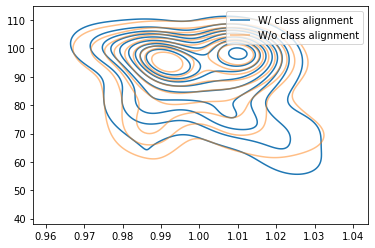

In [42]:
sns.kdeplot(x_input[sort_ind], y_input[sort_ind])
sns.kdeplot(x_input[sort_ind], y_noalign_input[sort_ind], alpha=0.5)
plt.legend(labels=["W/ class alignment","W/o class alignment"])
#sns.scatterplot(x_input, y_noalign_input)

In [33]:
a_d_th = pd.read_csv(os.path.join(a_d_align_path, "df_th.csv"))
a_w_th = pd.read_csv(os.path.join(a_w_align_path, "df_th.csv"))
d_a_th = pd.read_csv(os.path.join(d_a_align_path, "df_th.csv"))
w_a_th = pd.read_csv(os.path.join(w_a_align_path, "df_th.csv"))

a_d_mu = pd.read_csv(os.path.join(a_d_align_path, "df_mu.csv"))
a_w_mu = pd.read_csv(os.path.join(a_w_align_path, "df_mu.csv"))
d_a_mu = pd.read_csv(os.path.join(d_a_align_path, "df_mu.csv"))
w_a_mu = pd.read_csv(os.path.join(w_a_align_path, "df_mu.csv"))

a_d_sd = pd.read_csv(os.path.join(a_d_align_path, "df_sd.csv"))
a_w_sd = pd.read_csv(os.path.join(a_w_align_path, "df_sd.csv"))
d_a_sd = pd.read_csv(os.path.join(d_a_align_path, "df_sd.csv"))
w_a_sd = pd.read_csv(os.path.join(w_a_align_path, "df_sd.csv"))

a_d_acc = pd.read_csv(os.path.join(a_d_align_path, "acc.csv"))
a_w_acc = pd.read_csv(os.path.join(a_w_align_path, "acc.csv"))
d_a_acc = pd.read_csv(os.path.join(d_a_align_path, "acc.csv"))
w_a_acc = pd.read_csv(os.path.join(w_a_align_path, "acc.csv"))
w_a_acc

,epoch,test_acc,test_acc_class_1,test_acc_class_2,test_acc_class_3,test_acc_class_4,test_acc_class_5,test_acc_class_6,test_acc_class_7,test_acc_class_8,...,test_acc_class_22,test_acc_class_23,test_acc_class_24,test_acc_class_25,test_acc_class_26,test_acc_class_27,test_acc_class_28,test_acc_class_29,test_acc_class_30,test_acc_class_31
0,0,65.921193,73.913040,97.560974,95.833336,79.268295,63.888890,93.617020,85.71429,57.731960,...,92.0,90.81633,22.448980,56.666668,61.333332,49.0,53.535355,20.202020,58.333332,29.6875
1,2,66.737664,82.608696,97.560974,100.000000,71.951220,55.555557,91.489365,85.71429,67.010310,...,90.0,89.79592,27.551020,62.222220,68.000000,47.0,53.535355,23.232323,46.875000,40.6250
2,3,69.471069,83.695656,97.560974,98.611115,75.609760,63.888890,91.489365,89.01099,55.670105,...,94.0,88.77551,28.571428,65.555560,73.333336,48.0,59.595960,21.212122,58.333332,43.7500
3,4,71.920483,83.695656,98.780490,98.611115,81.707310,61.111110,91.489365,90.10989,64.948456,...,94.0,89.79592,25.510204,64.444440,73.333336,47.0,68.686870,22.222221,45.833332,53.1250
4,5,72.559460,86.956520,97.560974,95.833336,79.268295,66.666664,94.680855,92.30769,72.164950,...,94.0,90.81633,28.571428,71.111115,73.333336,48.0,67.676765,12.121212,51.041668,56.2500
5,6,72.665957,88.043480,97.560974,95.833336,76.829270,63.888890,92.553190,91.20879,70.103096,...,94.0,89.79592,28.571428,71.111115,74.666664,48.0,69.696970,14.141414,43.750000,59.3750
6,7,74.369897,88.043480,98.780490,97.222220,79.268295,44.444443,93.617020,89.01099,72.164950,...,95.0,91.83673,26.530613,75.555560,70.666664,48.0,77.777780,13.131313,50.000000,67.1875
7,8,74.440895,91.304344,97.560974,97.222220,81.707310,63.888890,92.553190,92.30769,64.948456,...,95.0,88.77551,27.551020,73.333336,68.000000,49.0,76.767680,16.161615,52.083332,67.1875
8,10,75.505857,95.652176,97.560974,95.833336,82.926830,55.555557,91.489365,89.01099,76.288660,...,94.0,90.81633,25.510204,81.111115,72.000000,49.0,72.727270,20.202020,53.125000,60.9375
9,14,75.825346,95.652176,96.341460,98.611115,84.146340,52.777780,94.680855,90.10989,74.226810,...,96.0,90.81633,29.591837,73.333336,58.666668,47.0,75.757576,20.202020,50.000000,64.0625


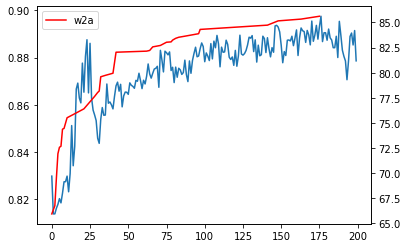

In [38]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(w_a_th.index, w_a_th.mean(axis=1), label="w2a")
ax2.plot(w_a_acc["epoch"], w_a_acc["test_acc"], label="w2a", color="r")
plt.legend()

No handles with labels found to put in legend.


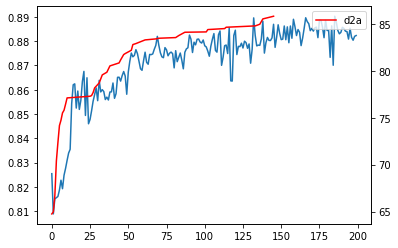

In [39]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(d_a_th.index, d_a_th.mean(axis=1), label="d2a")
plt.legend()
ax2.plot(d_a_acc["epoch"], d_a_acc["test_acc"], label="d2a", color="r")
plt.legend()

No handles with labels found to put in legend.


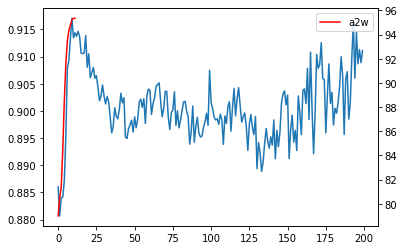

In [40]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(a_w_th.index, a_w_th.mean(axis=1), label="a2w")
plt.legend()
ax2.plot(a_w_acc["epoch"], a_w_acc["test_acc"], label="a2w", color="r")
plt.legend()